In [1]:
# First we import all neccessary libraries and give some of them an alias for easy access
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_samples
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import cm
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df_scaled = pd.read_csv("../../Data/Transformed/inventory_management_cleaned_transformed_jaron.csv", )
df_scaled

,Category,Region,Inventory Level,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Product_UID,Weekday
0,1,1,-0.399386,0.084333,-0.601533,1,0,0.343632,S001_P0001,2
1,0,1,-0.737767,0.268861,0.707999,1,1,0.493606,S001_P0002,2
2,0,1,-0.173798,-0.158233,0.053233,1,1,-0.267948,S001_P0003,2
3,1,1,-0.642326,0.454134,0.053233,1,0,0.330756,S001_P0004,2
4,3,1,-0.585929,-0.369795,-1.256300,1,0,-0.469424,S001_P0005,2
...,...,...,...,...,...,...,...,...,...,...
1717,3,1,-0.685708,-0.160961,0.053233,0,0,0.077541,S001_P0018,5
1718,2,1,-0.794164,0.735391,0.053233,0,1,0.418023,S001_P0019,5
1719,2,1,0.897742,1.039962,0.053233,0,0,0.753259,S001_P0020,5
1720,3,2,1.466049,0.007446,-0.601533,1,0,0.134526,S002_P0001,5


In [3]:
# We group the data by the unique Product_UID, now we are able to look at specific products
agg_df = df_scaled.groupby('Product_UID').agg({
    'Price': 'mean',
    'Discount': 'mean',
    'Inventory Level': 'mean',
    'Competitor Pricing': 'mean',
    'Category': 'first',
    'Region': 'first'
}).reset_index()
agg_df.head()

,Product_UID,Price,Discount,Inventory Level,Competitor Pricing,Category,Region
0,S001_P0001,-0.045300,0.053233,-0.248994,0.033775,1,1
1,S001_P0002,0.089831,0.162361,-0.508564,0.159005,0,1
2,S001_P0003,-0.279075,0.053233,0.400775,-0.281658,0,1
3,S001_P0004,0.571972,0.198737,-0.510010,0.594013,1,1
4,S001_P0005,-0.265364,0.235113,1.524615,-0.295461,3,1


In [4]:
# We Store the unique identifier column in a variable and then drop it for the analysis
product_ids = agg_df['Product_UID']
features = agg_df.drop(columns=['Product_UID'])
features.head()

,Price,Discount,Inventory Level,Competitor Pricing,Category,Region
0,-0.045300,0.053233,-0.248994,0.033775,1,1
1,0.089831,0.162361,-0.508564,0.159005,0,1
2,-0.279075,0.053233,0.400775,-0.281658,0,1
3,0.571972,0.198737,-0.510010,0.594013,1,1
4,-0.265364,0.235113,1.524615,-0.295461,3,1


In [5]:
# Apply the Principal Component Analysis (PCA) with a fixed number of principal components of 2 in order to be 
# able to visualize our results in two dimensions
pca = PCA(2)
pca_2d = pca.fit_transform(features)
pca_2d = pd.DataFrame(pca_2d, columns=['PC'+str(i) for i in range(1,pca_2d.shape[1]+1)])
pca_2d.head(5)

,PC1,PC2
0,0.756900,0.246198
1,1.555444,0.586636
2,1.137594,0.816241
3,1.369027,-0.170617
4,-0.845218,-0.525476


c:\Users\jaron\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


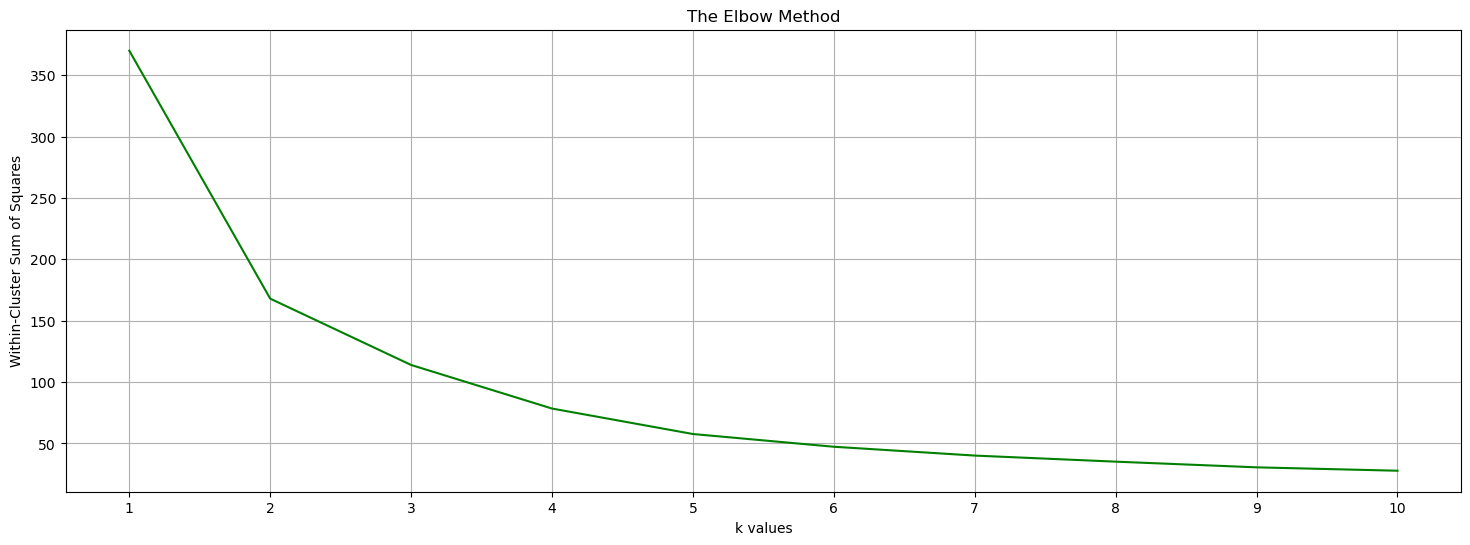

In [6]:
Y = pca_2d.copy()

inertia_score = []

# use Y for dataset with 2 PCAs 
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Y)
    inertia_score.append(kmeans.inertia_)

#Visualizing the inertia vs k plot
plt.figure(figsize=(18,6))
sns.lineplot(x=range(1,11),y=inertia_score,color='green')
plt.xticks(range(1,11))
plt.xlabel('k values')
plt.ylabel('Within-Cluster Sum of Squares')
plt.title('The Elbow Method')
plt.grid()
plt.show()

In [7]:
kmeans = KMeans(n_clusters=3, init="k-means++", n_init=10, random_state=42)
#kmeans.fit(Y)

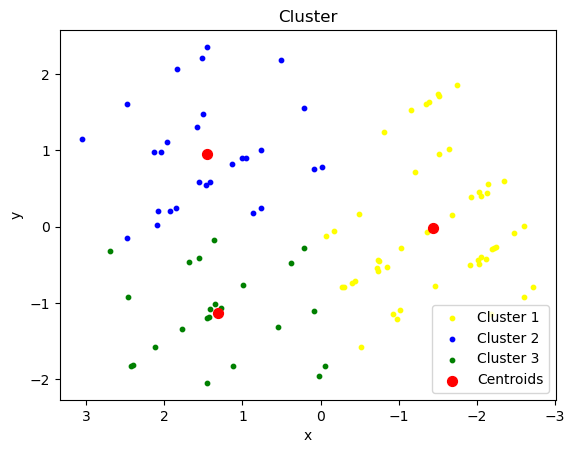

In [8]:
y_kmeans = kmeans.fit_predict(Y)
Y_np = Y.to_numpy()
plt.scatter(Y_np[y_kmeans == 0, 0], Y_np[y_kmeans == 0, 1], s = 10, c = 'yellow', 
            label = 'Cluster 1')
plt.scatter(Y_np[y_kmeans == 1, 0], Y_np[y_kmeans == 1, 1], s = 10, c = 'blue', 
            label = 'Cluster 2')
plt.scatter(Y_np[y_kmeans == 2, 0], Y_np[y_kmeans == 2, 1], s = 10, c = 'green', 
            label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, 
            c = 'red', label = 'Centroids')
plt.title('Cluster')
plt.xlabel('x')
plt.ylabel('y')
plt.gca().invert_xaxis()
plt.legend()
plt.show()

In [9]:
silhouette_score(Y, y_kmeans)

0.44077844358696505

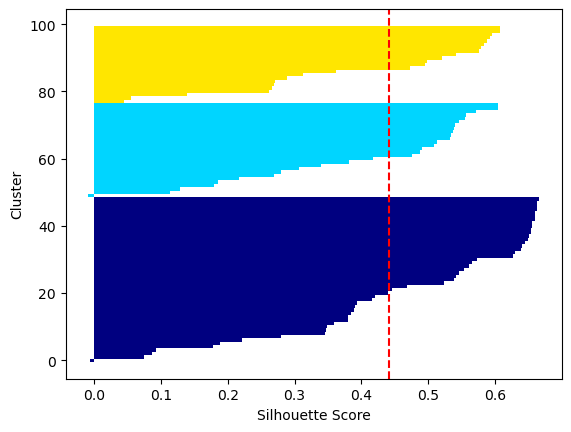

In [10]:
cluster_labels = np.unique(y_kmeans)
n_clusters=cluster_labels.shape [0]

silhouette_vals = silhouette_samples(Y, y_kmeans, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_kmeans == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet( i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
            c_silhouette_vals,
            height = 1.0,
            edgecolor = 'none',
            color = color)
    yticks.append((y_ax_lower + y_ax_upper) / 2 )
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color = 'red', linestyle = "--")
plt.ylabel('Cluster')
plt.xlabel('Silhouette Score')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.4686629173317833
For n_clusters = 3 The average silhouette_score is : 0.44211235172652913
For n_clusters = 4 The average silhouette_score is : 0.4338371149213605
For n_clusters = 5 The average silhouette_score is : 0.4577782558992224
For n_clusters = 6 The average silhouette_score is : 0.43453464741228276


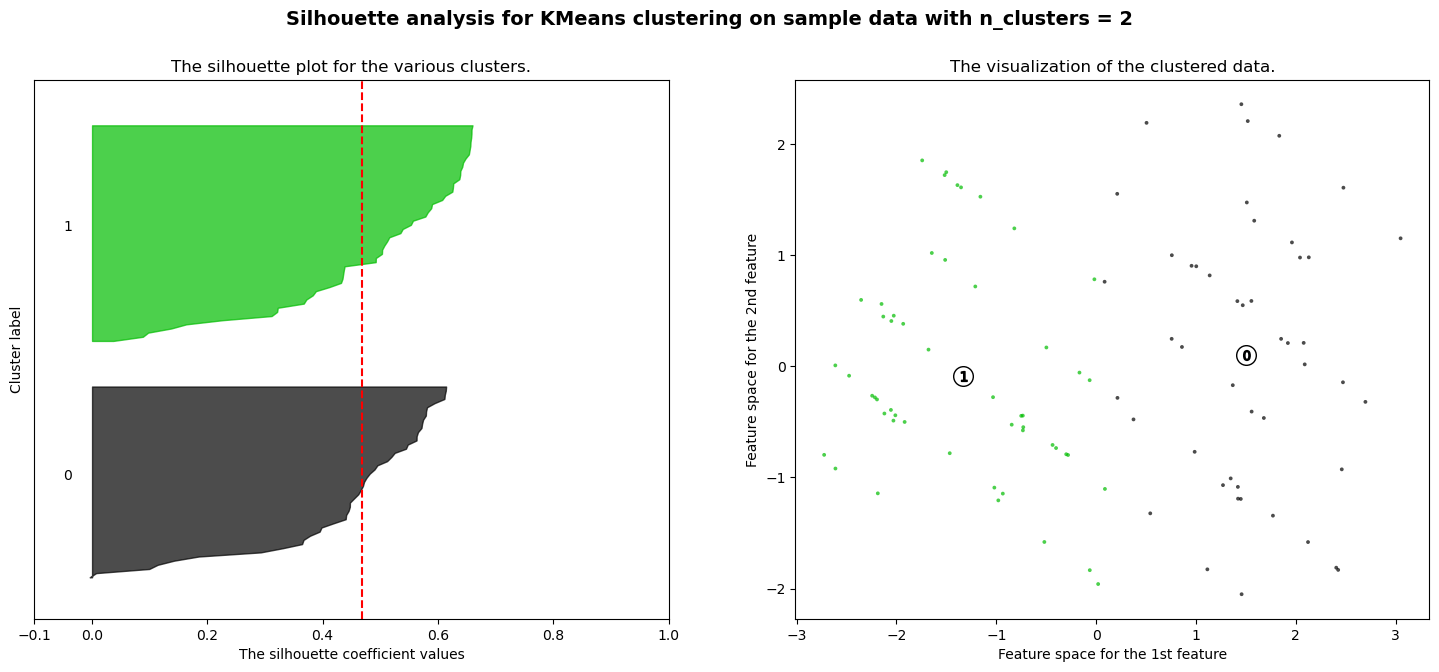

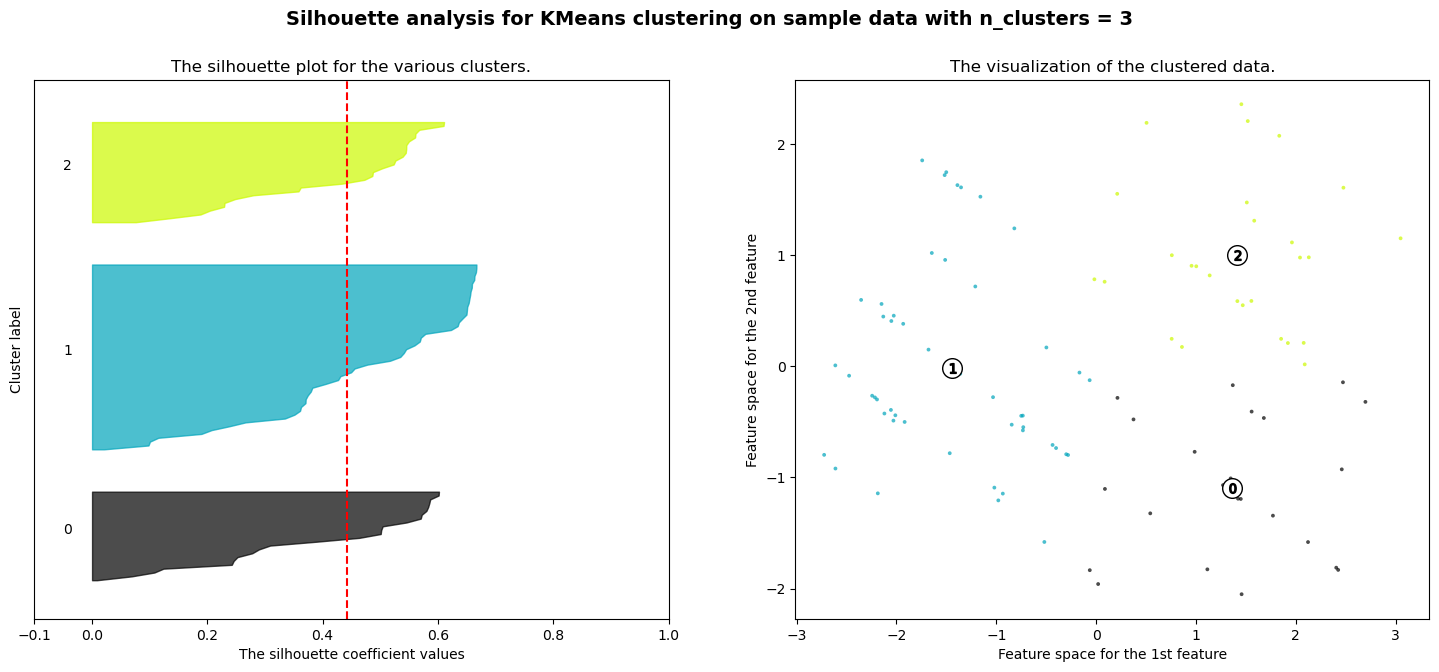

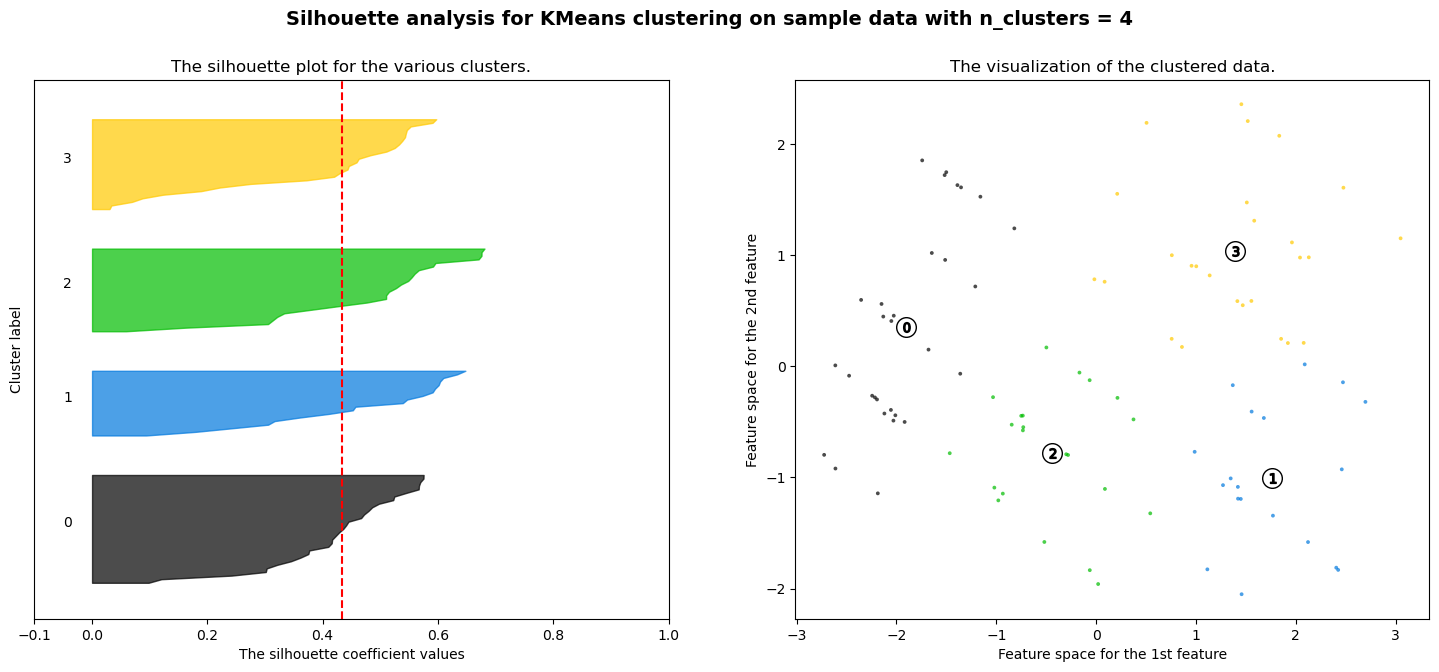

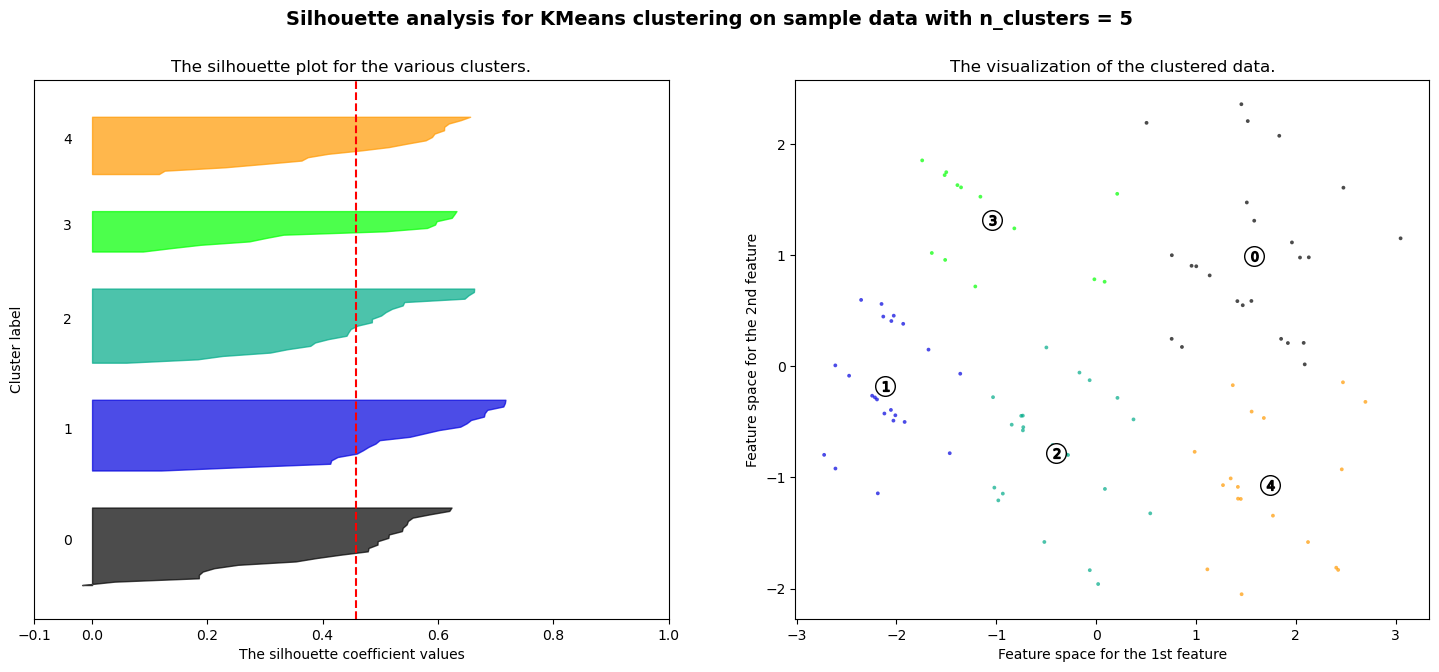

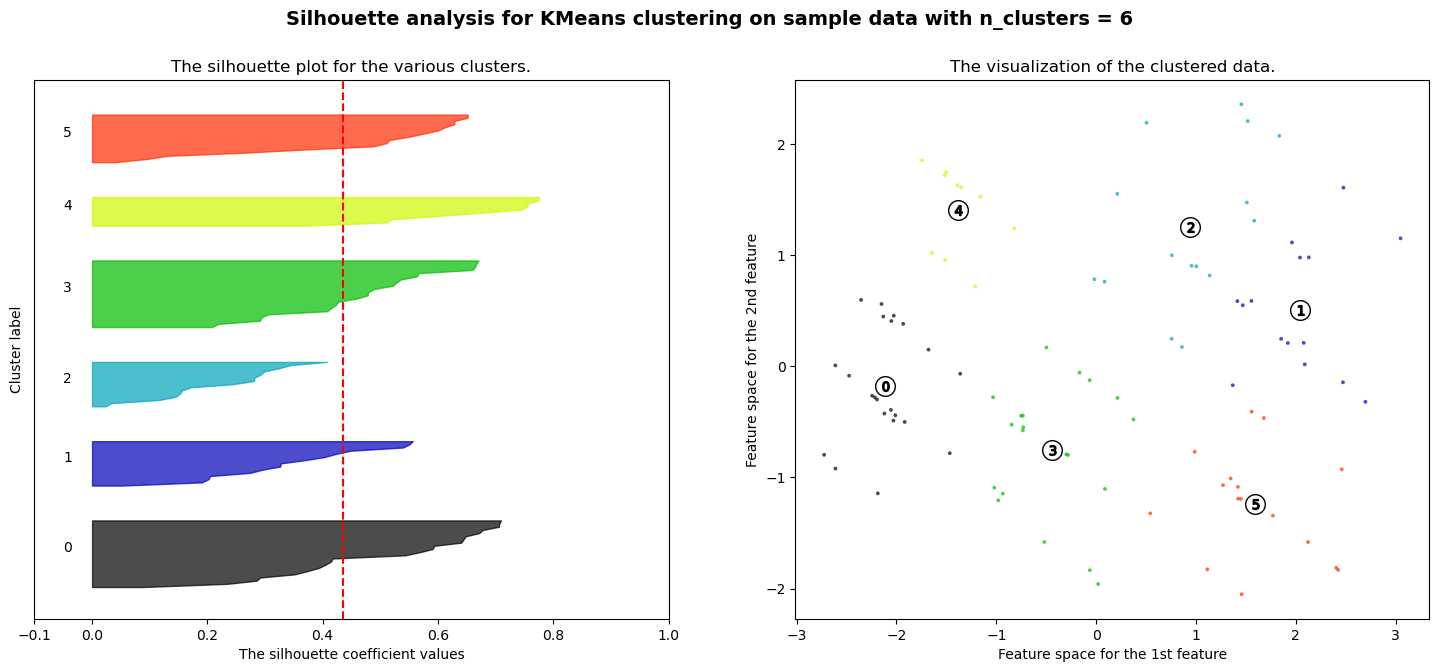

In [11]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(Y_np) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(Y_np)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(Y_np, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(Y_np, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(Y_np[:, 0], Y_np[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [12]:
data = pd.DataFrame(Y_np, columns=['PC' + str(i) for i in range(1, pca_2d.shape[1]+1)])
y_kmeans = pd.DataFrame(y_kmeans)
data['Clusterlabel'] = y_kmeans
data

,PC1,PC2,Clusterlabel
0,0.756900,0.246198,1
1,1.555444,0.586636,1
2,1.137594,0.816241,1
3,1.369027,-0.170617,2
4,-0.845218,-0.525476,0
...,...,...,...
95,-2.120404,-0.425188,0
96,-2.055120,-0.392888,0
97,0.211593,1.549708,1
98,1.771237,-1.343250,2


In [13]:
df_scaled['Clusters_Label'] = y_kmeans
df_scaled.head()

,Category,Region,Inventory Level,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Product_UID,Weekday,Clusters_Label
0,1,1,-0.399386,0.084333,-0.601533,1,0,0.343632,S001_P0001,2,1.0
1,0,1,-0.737767,0.268861,0.707999,1,1,0.493606,S001_P0002,2,1.0
2,0,1,-0.173798,-0.158233,0.053233,1,1,-0.267948,S001_P0003,2,1.0
3,1,1,-0.642326,0.454134,0.053233,1,0,0.330756,S001_P0004,2,2.0
4,3,1,-0.585929,-0.369795,-1.256300,1,0,-0.469424,S001_P0005,2,0.0
